<Figure size 640x480 with 0 Axes>

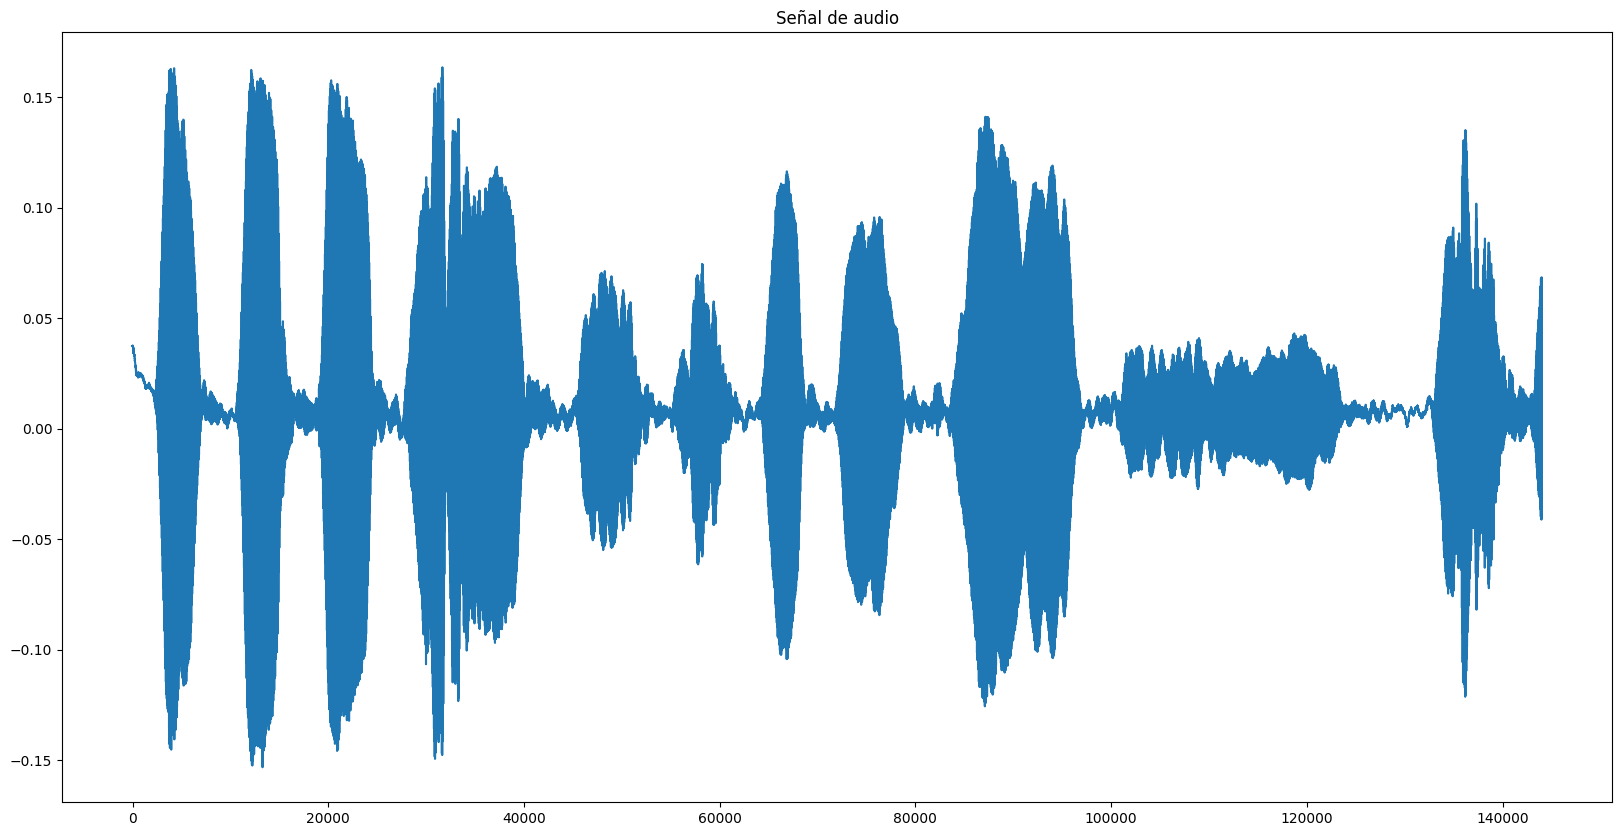

<Figure size 640x480 with 0 Axes>

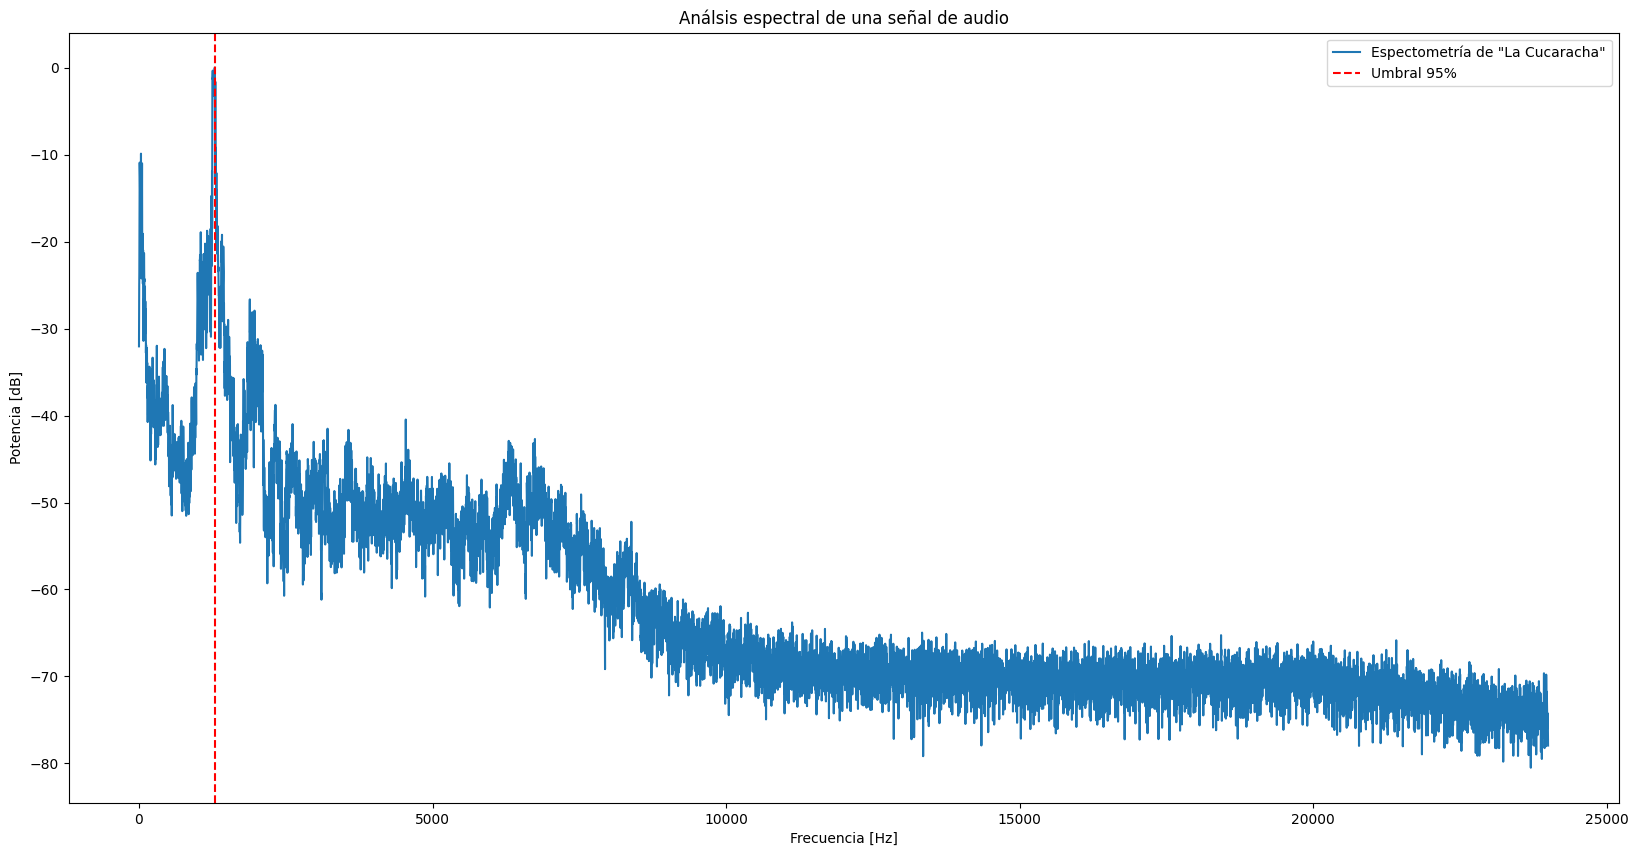

In [130]:
import numpy as np
from scipy import signal as sig

import matplotlib.pyplot as plt
   
import scipy.io as sio
from scipy.io.wavfile import write

#%% Señal de Audio

# Cargar el archivo CSV como un array de NumPy
fs_audio, wav_data = sio.wavfile.read('la cucaracha.wav')
# fs_audio, wav_data = sio.wavfile.read('prueba psd.wav')
#fs_audio, wav_data = sio.wavfile.read('silbido.wav')

plt.figure(1)
plt.figure(figsize=(20,10))
plt.title('Señal de audio')
plt.plot(wav_data)

N = len(wav_data)

nperseg = N // 6

audio_signal = wav_data / np.std(wav_data)

fs_audio_welch, audio_sig_welch = sig.welch(x = audio_signal, fs = fs_audio, window='hann', nperseg=nperseg, noverlap=nperseg//2, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=0, average='median')

signal_db =  10 * np.log10(audio_sig_welch)

signal_db -= max(signal_db)

#%% Estimacion del ancho de banda

pot_total = np.sum(audio_sig_welch)

pot_acumulada = np.cumsum(audio_sig_welch)
condicion_95 = 0.95 * pot_total

umbral_95 = np.where(pot_acumulada >= condicion_95)[0][0]

bw_95_au = fs_audio_welch[umbral_95]

plt.figure(4)
plt.figure(figsize=(20,10))
plt.title('Análsis espectral de una señal de audio')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia [dB]')

plt.plot(fs_audio_welch, signal_db, label = 'Espectometría de "La Cucaracha"')
plt.axvline(bw_95_au, color='r', linestyle='--', label='Umbral 95%')
plt.legend()

plt.show()

<Figure size 640x480 with 0 Axes>

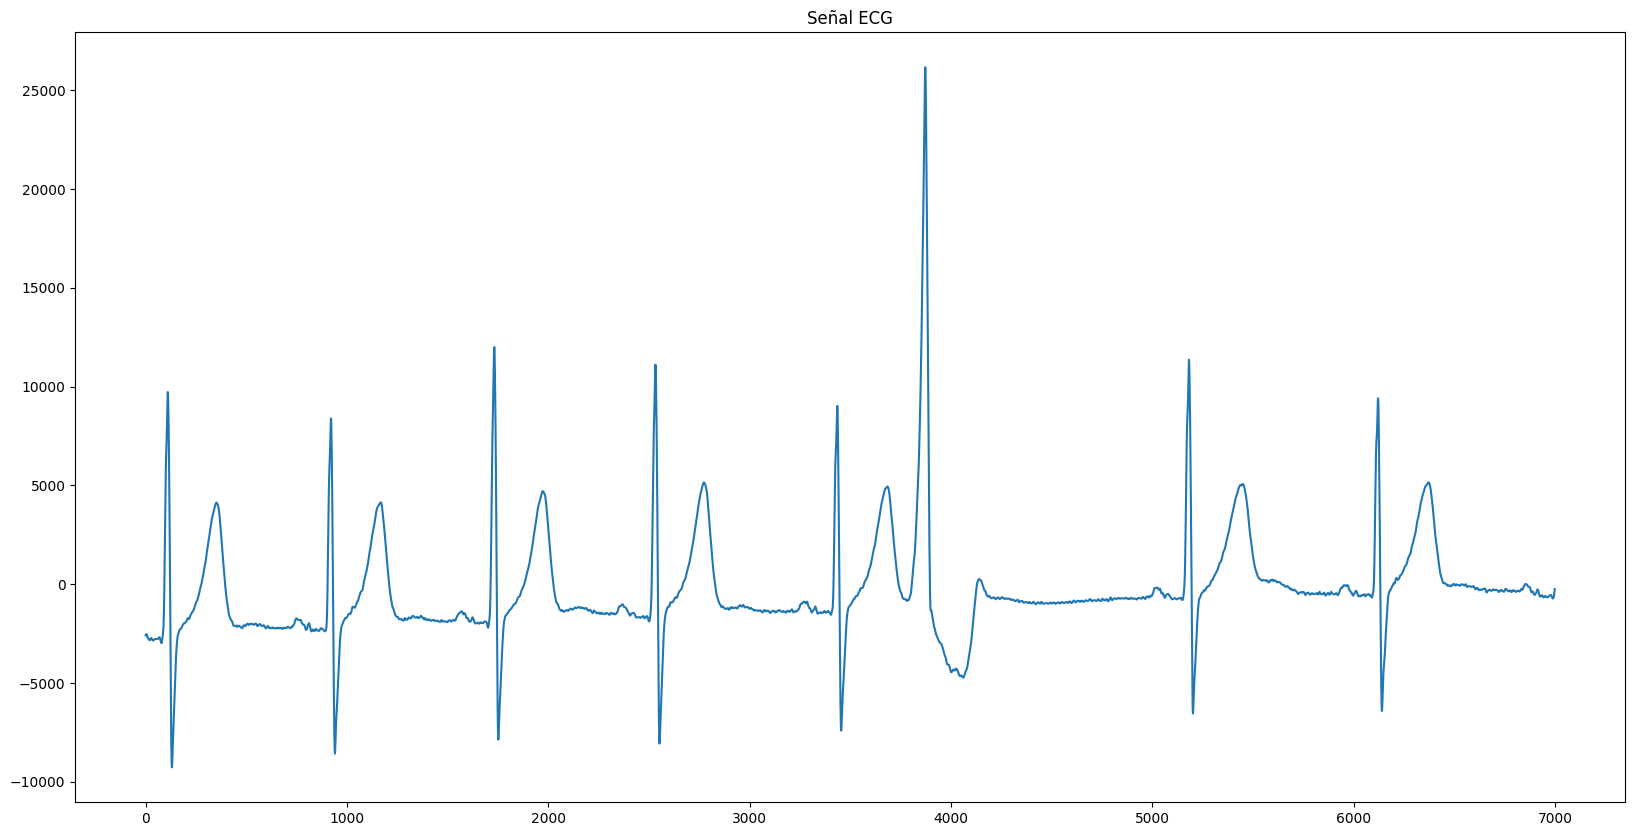

<Figure size 640x480 with 0 Axes>

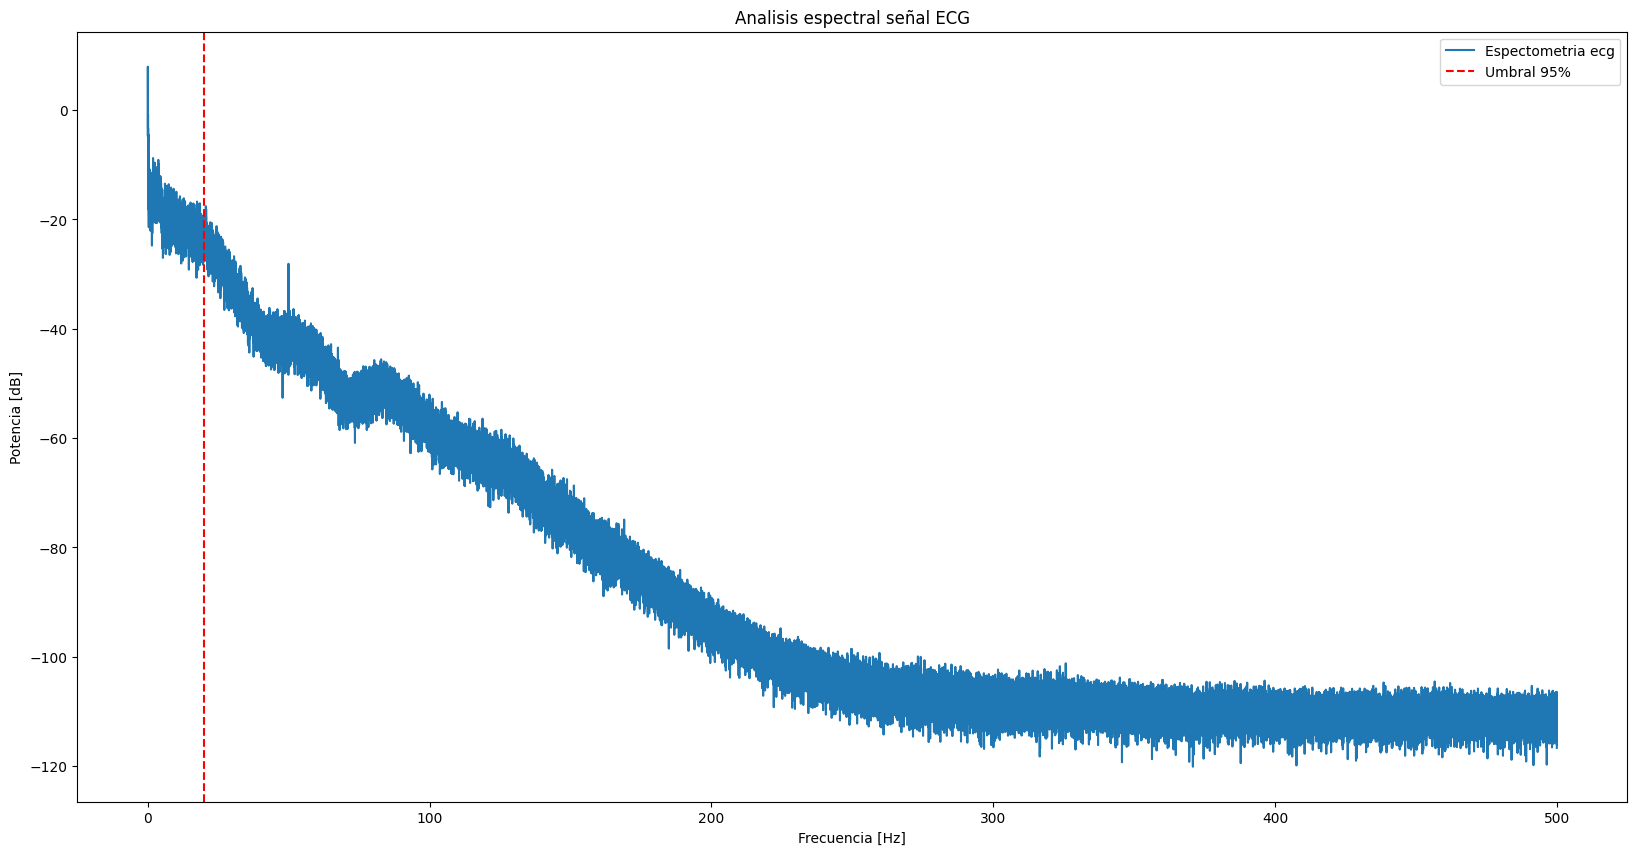

In [131]:
def vertical_flaten(a):

    return a.reshape(a.shape[0],1)

#%% Señal ECG

fs_ecg = 1000 # Hz

##################
## ECG con ruido
##################x

#para listar las variables que hay en el archivo
sio.whosmat('ECG_TP4.mat')
mat_struct = sio.loadmat('./ECG_TP4.mat')

ecg_one_lead = vertical_flaten(mat_struct['ecg_lead'])

plt.figure(1)
plt.figure(figsize=(20,10))
plt.title('Señal ECG')
plt.plot(ecg_one_lead[5000:12000])
plt.show()

N = len(ecg_one_lead)

nperseg = N // 6

audio_signal = ecg_one_lead / np.std(ecg_one_lead)

fs_ecg_welch, ecg_sig_welch = sig.welch(x = audio_signal, fs = fs_ecg, window='hann', nperseg=nperseg, noverlap=nperseg//2, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=0, average='median')

signal_db =  10 * np.log10(ecg_sig_welch)

#signal_db -= max(signal_db)

#%% Estimacion del ancho de banda

pot_total = np.sum(ecg_sig_welch)

pot_acumulada = np.cumsum(ecg_sig_welch)
condicion_95 = 0.95 * pot_total

umbral_95 = np.where(pot_acumulada >= condicion_95)[0][0]

bw_95_ecg = fs_ecg_welch[umbral_95]

plt.figure(4)
plt.figure(figsize=(20,10))
plt.title('Analisis espectral señal ECG')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia [dB]')

plt.plot(fs_ecg_welch, signal_db, label = 'Espectometria ecg')
plt.axvline(bw_95_ecg, color='r', linestyle='--', label = 'Umbral 95%')
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

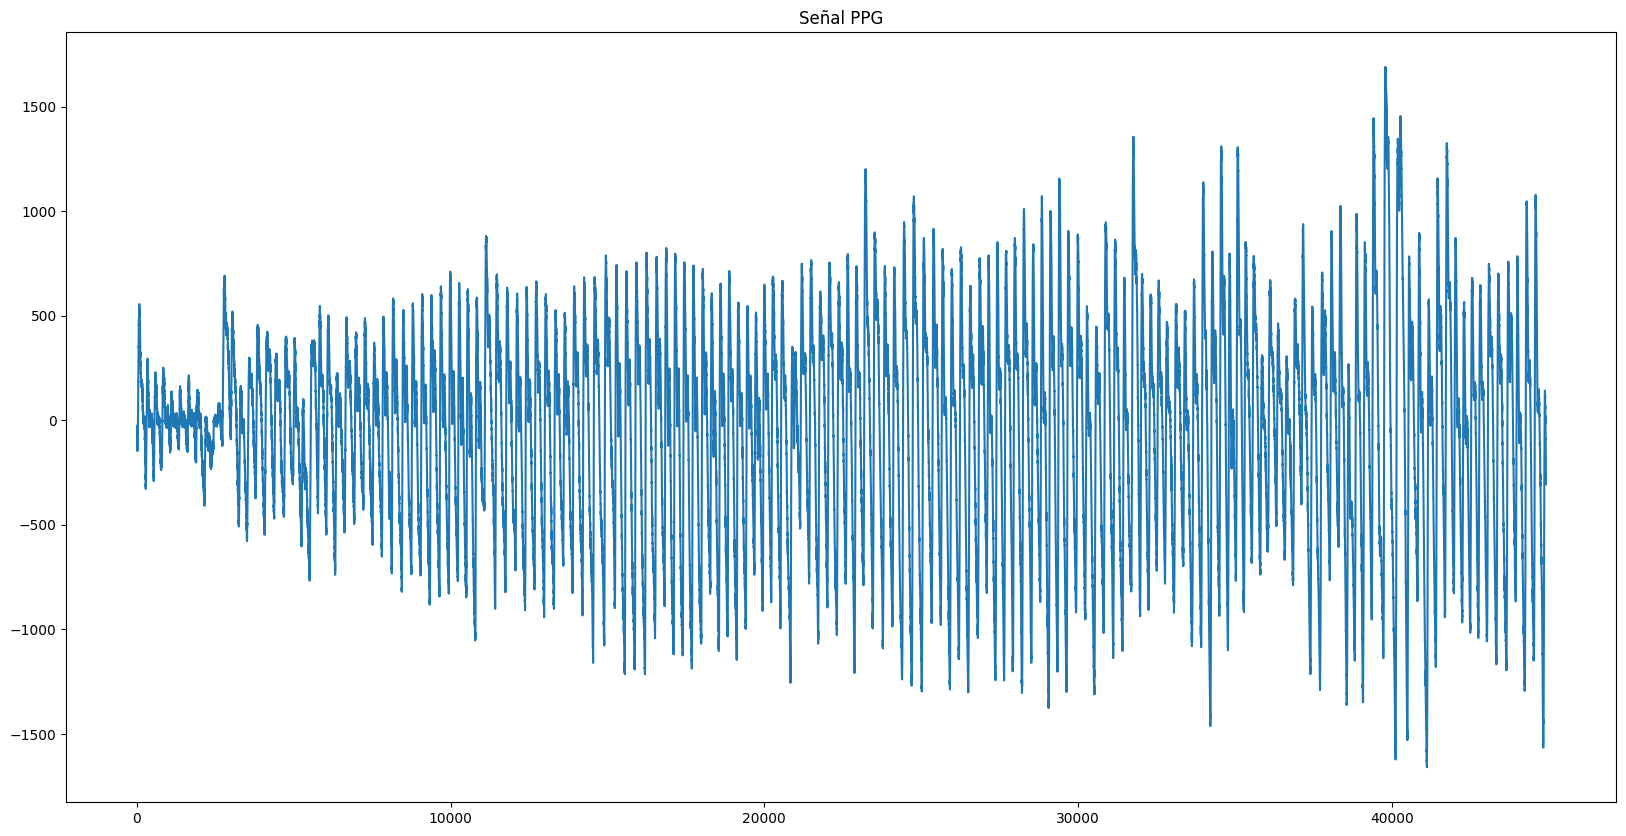

C:\Users\mateo\AppData\Local\Temp\ipykernel_28008\1504336559.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 640x480 with 0 Axes>

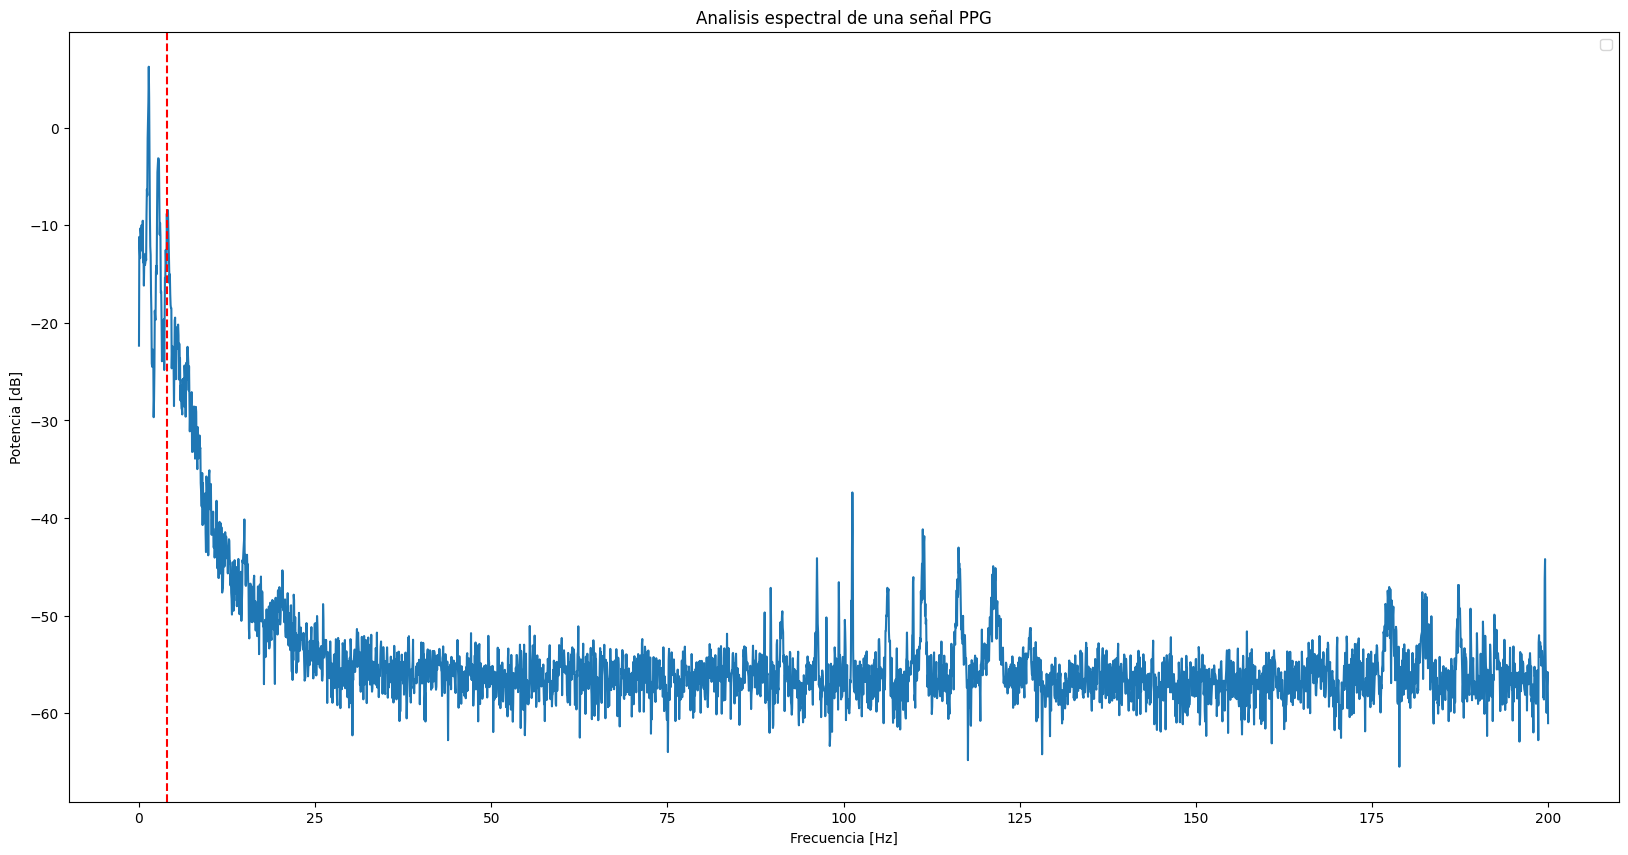

In [132]:
fs_ppg = 400 # Hz

##################
## PPG con ruido
##################

# # Cargar el archivo CSV como un array de NumPy
# ppg = np.genfromtxt('PPG.csv', delimiter=',', skip_header=1)  # Omitir la cabecera si existe

##################
## PPG sin ruido
##################

ppg = np.load('ppg_sin_ruido.npy')

plt.figure(1)
plt.figure(figsize=(20,10))
plt.title('Señal PPG')
plt.plot(ppg)
plt.show()

N = len(ppg)

nperseg = N // 6

audio_signal = ppg / np.std(ppg)

fs_ppg_welch, ppg_sig_welch = sig.welch(x = audio_signal, fs = fs_ppg, window='hann', nperseg=nperseg, noverlap=nperseg//2, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=0, average='median')

signal_db =  10 * np.log10(ppg_sig_welch)

#signal_db -= max(signal_db)

#%% Estimacion del ancho de banda

pot_total = np.sum(ppg_sig_welch)

pot_acumulada = np.cumsum(ppg_sig_welch)
condicion_95 = 0.95 * pot_total

umbral_95 = np.where(pot_acumulada >= condicion_95)[0][0]

bw_95_ppg = fs_ppg_welch[umbral_95]

plt.figure(4)
plt.figure(figsize=(20,10))

plt.title('Analisis espectral de una señal PPG')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia [dB]')
plt.legend()
plt.plot(fs_ppg_welch, signal_db, label = 'Espectrometria señal PPG')
plt.axvline(bw_95_ppg, color='r', linestyle='--', label = 'Umbral 95%')
plt.show()


In [133]:
print("Señal de Audio: ")
print(f"          ♦ BW =  {bw_95_au:.2f} Hz")

print("\nSeñal ECG: ")
print(f"          ♦ BW =  {bw_95_ecg:.2f} Hz")

print("\nSeñal PPG: ")
print(f"          ♦ BW =  {bw_95_ppg:.2f} Hz")

Señal de Audio: 
          ♦ BW =  1302.00 Hz

Señal ECG: 
          ♦ BW =  19.97 Hz

Señal PPG: 
          ♦ BW =  4.01 Hz


Se observa entonces que, bajo la suposición de que todas las señales actuan como pasa bajos, el aporte de energía de las señales analizadas en relación al aumento de la frecuencia es cada vez menor. Por esto, los umbrales en los cuales se cumple un aporte del 95% de la energía pudieron ser calculados de la misma forma, bajo esta suposición. Este umbral además, por propiedad, indica donde se termina la banda de paso y, debido a lo asumido anteriormente, podemos denotarlo como el ancho de banda que figura en la tabla de arriba.
En la misma, se ve que aquellas señales con una respuesta de su espectro más pronunciada, alcanzan la banda de stop a una frecuencia menor.